In [1]:
from pyphm.datasets.milling import MillingPrepMethodA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import scipy.io as sio # for reading matlab files
import zipfile
import gdown
import os
import glob

import warnings
warnings.filterwarnings("ignore") # supress all the matplotlib deprecation warnings
from IPython.display import clear_output, display, Image # incase you want to clear the output of a cell
%load_ext autoreload
%autoreload 2

c:\Users\stajyer\tspipe\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_colab = Path.cwd().parent.parent / 'content'

if path_colab.exists():
    proj_dir = Path.cwd()
else:
    proj_dir = Path.cwd().parent

print(proj_dir)

c:\Users\stajyer\tspipe


In [3]:
raw_data_dir = proj_dir / 'data' / 'raw'

mill = MillingPrepMethodA(root=raw_data_dir, download=False)
data = mill.load_mat()

raw_milling_data_dir = raw_data_dir / 'milling'
processed_data_dir = proj_dir / 'data' / 'processed'
sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'

WINDOW = 1024
STRIDE = 64

milling_data_window = MillingPrepMethodA(root=raw_data_dir, window_len=WINDOW, stride=STRIDE, download=True)

df = milling_data_window.create_xy_dataframe()

print("Shape: ", df.shape)

Path(sub_dir).mkdir(parents=True, exist_ok=True)

df.to_csv(sub_dir / 'milling_processed.csv.gz', compression='gzip', index=False)

Shape:  (9313280, 11)


In [3]:
sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'

df = pd.read_csv(sub_dir / 'milling_processed.csv.gz')
df.head()

,cut_id,cut_no,case,time,ae_spindle,ae_table,vib_spindle,vib_table,smcdc,smcac,tool_class
0,0_0,0,1,0.000,0.219727,0.272827,0.733643,2.116699,6.840820,0.124512,0
1,0_0,0,1,0.004,0.246582,0.322266,0.778809,2.277832,6.660156,-0.561523,0
2,0_0,0,1,0.008,0.294189,0.283813,0.758057,2.343750,6.508789,-2.099609,0
3,0_0,0,1,0.012,0.323486,0.260010,0.726318,2.448730,6.542969,-2.731934,0
4,0_0,0,1,0.016,0.290527,0.253296,0.653076,2.546387,6.621094,-3.505859,0


In [4]:
raw_data_dir = proj_dir / 'data' / 'raw'

raw_milling_data = pd.read_csv(raw_data_dir / 'milling' / 'mill.csv')
raw_milling_data = raw_milling_data.drop(['Unnamed: 0'], axis=1)

In [223]:
raw_milling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case         167 non-null    int64  
 1   run          167 non-null    int64  
 2   VB           146 non-null    float64
 3   time         167 non-null    int64  
 4   DOC          167 non-null    float64
 5   feed         167 non-null    float64
 6   material     167 non-null    int64  
 7   smcAC        167 non-null    float64
 8   smcDC        167 non-null    float64
 9   vib_table    167 non-null    float64
 10  vib_spindle  167 non-null    float64
 11  AE_table     167 non-null    float64
 12  AE_spindle   167 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 17.1 KB


In [36]:
raw_milling_data.describe()

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
count,167.000000,167.000000,146.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,1.670000e+02,167.000000,1.670000e+02,167.000000
mean,8.329341,7.167665,0.337603,26.113772,1.032934,0.372754,1.347305,-0.164495,1.336546e+00,7.948459e-02,0.285652,1.004229e-01,0.123872
std,4.764886,4.969367,0.260528,23.292643,0.364616,0.125356,0.477546,0.357721,1.893880e-01,3.654218e-02,0.030758,2.469953e-02,0.021194
min,1.000000,1.000000,0.000000,0.000000,0.750000,0.250000,1.000000,-0.798340,2.084677e-33,1.054677e-08,0.000003,4.074626e-11,0.000003
25%,3.000000,3.000000,0.150000,7.500000,0.750000,0.250000,1.000000,-0.551758,1.350098e+00,6.103516e-02,0.274658,9.277344e-02,0.110474
50%,10.000000,6.000000,0.285000,19.000000,0.750000,0.250000,1.000000,-0.156250,1.372070e+00,6.835938e-02,0.284424,1.019287e-01,0.122070
75%,12.000000,10.000000,0.467500,39.000000,1.500000,0.500000,2.000000,0.206299,1.391602e+00,8.300781e-02,0.297852,1.147461e-01,0.136414
max,16.000000,23.000000,1.530000,105.000000,1.500000,0.500000,2.000000,0.378418,1.450195e+00,2.929688e-01,0.391846,1.495361e-01,0.181274


In [37]:
raw_milling_data.isna().sum()

case            0
run             0
VB             21
time            0
DOC             0
feed            0
material        0
smcAC           0
smcDC           0
vib_table       0
vib_spindle     0
AE_table        0
AE_spindle      0
dtype: int64

In [52]:
### Pearson ###

pearson_corr = raw_milling_data.corr(method="pearson")

In [49]:
pearson_corr.style.background_gradient(cmap="coolwarm")

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.047886,0.253373,-0.109221,-0.160580,-0.194160,0.473620,-0.058081,0.162363,-0.477796,-0.182004,-0.029627,-0.110367
run,-0.047886,1.000000,0.625733,0.941573,-0.248264,-0.129943,-0.303920,-0.024212,0.204143,0.133830,-0.089062,0.105327,0.031430
VB,0.253373,0.625733,1.000000,0.509063,-0.033653,-0.019937,0.261415,-0.059403,0.149946,-0.110606,-0.254839,0.011542,-0.149821
time,-0.109221,0.941573,0.509063,1.000000,-0.258633,-0.156453,-0.443332,0.007973,0.206681,0.239667,-0.127997,0.184416,0.147960
DOC,-0.160580,-0.248264,-0.033653,-0.258633,1.000000,0.174614,-0.048788,0.021207,-0.148442,-0.096102,0.210296,0.024933,-0.059588
feed,-0.194160,-0.129943,-0.019937,-0.156453,0.174614,1.000000,-0.037209,0.104865,-0.198365,-0.233306,0.087499,-0.134397,-0.211765
material,0.473620,-0.303920,0.261415,-0.443332,-0.048788,-0.037209,1.000000,-0.010944,0.107970,-0.296074,0.006835,-0.282081,-0.256921
smcAC,-0.058081,-0.024212,-0.059403,0.007973,0.021207,0.104865,-0.010944,1.000000,-0.047164,0.161031,-0.034614,-0.026528,-0.068505
smcDC,0.162363,0.204143,0.149946,0.206681,-0.148442,-0.198365,0.107970,-0.047164,1.000000,0.095938,0.311706,0.195128,0.300523
vib_table,-0.477796,0.133830,-0.110606,0.239667,-0.096102,-0.233306,-0.296074,0.161031,0.095938,1.000000,0.077093,0.265829,0.383685


In [53]:
### Kendall ###

kendall_corr = raw_milling_data.corr(method="kendall")

In [50]:
kendall_corr.style.background_gradient(cmap="coolwarm")

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.054634,0.132062,-0.112893,-0.160001,-0.158933,0.435839,-0.045439,-0.096855,-0.359356,-0.184293,-0.078955,-0.093044
run,-0.054634,1.000000,0.576746,0.842698,-0.199826,-0.079325,-0.248990,-0.007019,0.251167,0.113295,-0.183083,0.031835,0.021630
VB,0.132062,0.576746,1.000000,0.505498,0.032256,0.029855,0.152082,0.005630,0.140898,-0.063339,-0.248042,-0.062952,-0.089705
time,-0.112893,0.842698,0.505498,1.000000,-0.183463,-0.102835,-0.381863,0.009877,0.255693,0.147650,-0.187404,0.110596,0.099874
DOC,-0.160001,-0.199826,0.032256,-0.183463,1.000000,0.174614,-0.048788,0.028081,-0.016605,-0.121611,0.166047,-0.025953,-0.066938
feed,-0.158933,-0.079325,0.029855,-0.102835,0.174614,1.000000,-0.037209,0.086777,-0.065438,-0.107170,0.139429,-0.165192,-0.186523
material,0.435839,-0.248990,0.152082,-0.381863,-0.048788,-0.037209,1.000000,-0.011885,-0.102629,-0.259647,-0.046896,-0.246162,-0.243497
smcAC,-0.045439,-0.007019,0.005630,0.009877,0.028081,0.086777,-0.011885,1.000000,0.188990,0.010596,-0.040865,-0.048563,-0.055061
smcDC,-0.096855,0.251167,0.140898,0.255693,-0.016605,-0.065438,-0.102629,0.188990,1.000000,0.046040,-0.062811,-0.010145,-0.013393
vib_table,-0.359356,0.113295,-0.063339,0.147650,-0.121611,-0.107170,-0.259647,0.010596,0.046040,1.000000,0.022381,0.135270,0.148678


In [54]:
### Spearman ###

spearman_corr = raw_milling_data.corr(method="spearman")

In [51]:
spearman_corr.style.background_gradient(cmap="coolwarm")

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.071892,0.195280,-0.159326,-0.188780,-0.187521,0.514235,-0.064788,-0.132589,-0.512118,-0.258515,-0.099497,-0.121757
run,-0.071892,1.000000,0.745307,0.952192,-0.236908,-0.094045,-0.295196,-0.007193,0.359337,0.168812,-0.254311,0.047977,0.033287
VB,0.195280,0.745307,1.000000,0.669358,0.039084,0.036174,0.184275,0.004023,0.212770,-0.091406,-0.358086,-0.090992,-0.134186
time,-0.159326,0.952192,0.669358,1.000000,-0.221547,-0.124182,-0.461133,0.011381,0.366659,0.223404,-0.264623,0.158800,0.144986
DOC,-0.188780,-0.236908,0.039084,-0.221547,1.000000,0.174614,-0.048788,0.034214,-0.019887,-0.145189,0.200984,-0.031526,-0.081376
feed,-0.187521,-0.094045,0.036174,-0.124182,0.174614,1.000000,-0.037209,0.105729,-0.078369,-0.127949,0.168767,-0.200667,-0.226755
material,0.514235,-0.295196,0.184275,-0.461133,-0.048788,-0.037209,1.000000,-0.014480,-0.122908,-0.309989,-0.056763,-0.299025,-0.296018
smcAC,-0.064788,-0.007193,0.004023,0.011381,0.034214,0.105729,-0.014480,1.000000,0.283063,0.014430,-0.055569,-0.071661,-0.081625
smcDC,-0.132589,0.359337,0.212770,0.366659,-0.019887,-0.078369,-0.122908,0.283063,1.000000,0.071636,-0.091360,-0.011405,-0.018348
vib_table,-0.512118,0.168812,-0.091406,0.223404,-0.145189,-0.127949,-0.309989,0.014430,0.071636,1.000000,0.038466,0.195722,0.215589


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9313280 entries, 0 to 9313279
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cut_id       object 
 1   cut_no       int64  
 2   case         int64  
 3   time         float64
 4   ae_spindle   float64
 5   ae_table     float64
 6   vib_spindle  float64
 7   vib_table    float64
 8   smcdc        float64
 9   smcac        float64
 10  tool_class   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 781.6+ MB


In [4]:
df.describe()

,cut_no,case,time,ae_spindle,ae_table,vib_spindle,vib_table,smcdc,smcac,tool_class
count,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06
mean,8.302804e+01,8.322265e+00,2.046000e+00,2.449860e-01,2.044290e-01,3.138266e-01,9.695972e-01,7.375682e+00,-1.572128e-01,7.089610e-01
std,4.794389e+01,4.719888e+00,1.182413e+00,9.098135e-02,7.263016e-02,7.656384e-02,3.957817e-01,2.042010e+00,2.093879e+00,5.935905e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,9.094238e-02,1.220703e-02,2.160644e-01,1.904297e-01,3.417969e+00,-6.967773e+00,0.000000e+00
25%,4.200000e+01,3.000000e+00,1.023000e+00,1.782227e-01,1.544189e-01,2.734375e-01,6.909180e-01,5.712891e+00,-1.784668e+00,0.000000e+00
50%,8.200000e+01,1.000000e+01,2.046000e+00,2.227783e-01,1.916504e-01,2.905273e-01,9.033203e-01,7.338867e+00,-1.489258e-01,1.000000e+00
75%,1.250000e+02,1.200000e+01,3.069000e+00,2.917480e-01,2.459717e-01,3.173828e-01,1.159668e+00,9.599609e+00,1.464844e+00,1.000000e+00
max,1.660000e+02,1.600000e+01,4.092000e+00,9.790039e-01,6.121826e-01,1.657715e+00,2.861328e+00,9.995117e+00,6.777344e+00,2.000000e+00


In [5]:
df.isna().sum()

cut_id         0
cut_no         0
case           0
time           0
ae_spindle     0
ae_table       0
vib_spindle    0
vib_table      0
smcdc          0
smcac          0
tool_class     0
dtype: int64

In [5]:
# --- EXAMPLE 1 ---

from tsfresh import feature_extraction

sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "root_mean_square": None,
    "mean": None,
    "kurtosis": None
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.head()

Feature Extraction: 100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


,cut_id,cut_no__root_mean_square,cut_no__mean,cut_no__kurtosis,case__root_mean_square,case__mean,case__kurtosis,ae_spindle__root_mean_square,ae_spindle__mean,ae_spindle__kurtosis,...,smcdc__kurtosis,smcac__root_mean_square,smcac__mean,smcac__kurtosis,tool_class__root_mean_square,tool_class__mean,tool_class__kurtosis,cut_no,case,tool_class
0,0_0,0.0,0.0,0.0,1.0,1.0,0.0,0.218442,0.213459,0.362453,...,-0.017042,1.835022,-0.193081,-1.266514,0.0,0.0,0.0,0,1,0
1,0_1,0.0,0.0,0.0,1.0,1.0,0.0,0.216922,0.212069,0.487595,...,-0.042394,1.832819,-0.162208,-1.256077,0.0,0.0,0.0,0,1,0
2,0_10,0.0,0.0,0.0,1.0,1.0,0.0,0.211146,0.207769,0.439928,...,-0.061250,1.824547,-0.180714,-1.265339,0.0,0.0,0.0,0,1,0
3,0_11,0.0,0.0,0.0,1.0,1.0,0.0,0.210489,0.207282,0.426394,...,-0.062503,1.819315,-0.184751,-1.267439,0.0,0.0,0.0,0,1,0
4,0_12,0.0,0.0,0.0,1.0,1.0,0.0,0.210593,0.207503,0.502707,...,-0.083880,1.816610,-0.136020,-1.259084,0.0,0.0,0.0,0,1,0


In [6]:
# --- EXAMPLE 2 ---

from tsfresh import feature_extraction

sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "fft_coefficient": [{"coeff": 5, "attr": s} for s in ["real", "imag", "abs", "angle"]]
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.head()

Feature Extraction: 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]


,cut_id,"cut_no__fft_coefficient__attr_""real""__coeff_5","cut_no__fft_coefficient__attr_""imag""__coeff_5","cut_no__fft_coefficient__attr_""abs""__coeff_5","cut_no__fft_coefficient__attr_""angle""__coeff_5","case__fft_coefficient__attr_""real""__coeff_5","case__fft_coefficient__attr_""imag""__coeff_5","case__fft_coefficient__attr_""abs""__coeff_5","case__fft_coefficient__attr_""angle""__coeff_5","ae_spindle__fft_coefficient__attr_""real""__coeff_5",...,"smcac__fft_coefficient__attr_""imag""__coeff_5","smcac__fft_coefficient__attr_""abs""__coeff_5","smcac__fft_coefficient__attr_""angle""__coeff_5","tool_class__fft_coefficient__attr_""real""__coeff_5","tool_class__fft_coefficient__attr_""imag""__coeff_5","tool_class__fft_coefficient__attr_""abs""__coeff_5","tool_class__fft_coefficient__attr_""angle""__coeff_5",cut_no,case,tool_class
0,0_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.410935,...,37.844972,64.889541,35.677442,0.0,0.0,0.0,0.0,0,1,0
1,0_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292361,...,68.351345,88.072253,129.096710,0.0,0.0,0.0,0.0,0,1,0
2,0_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.518225,...,-77.430252,79.462937,-77.012652,0.0,0.0,0.0,0.0,0,1,0
3,0_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.771915,...,44.369712,69.037336,39.992815,0.0,0.0,0.0,0.0,0,1,0
4,0_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466645,...,62.011007,74.819206,124.023173,0.0,0.0,0.0,0.0,0,1,0


In [7]:
# --- EXAMPLE 3 ---

from tsfresh import feature_extraction

sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "cwt_coefficients": [{"widths": width, "coeff": coeff, "w": w} for
                             width in [(2, 5, 10, 20)] for coeff in range(15) for w in (2, 5, 10, 20)],
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.head()

Feature Extraction: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


,cut_id,"cut_no__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_10__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)",...,"tool_class__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)",cut_no,case,tool_class
0,0_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,0_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,0_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,0_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [9]:
from tsfresh import feature_extraction

window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "abs_energy": None,
    "absolute_sum_of_changes": None,
    "agg_autocorrelation": [{"f_agg": s, "maxlag": 35} for s in ["mean", "median", "var"]],
    "agg_linear_trend": [{"f_agg": s, "attr": n, "chunk_len": 10} for s in ["max", "min", "mean", "var"]
                           for n in ["pvalue", "rvalue", "intercept", "slope", "stderr"]],
    "approximate_entropy": [{"m": 2, "r": r} for r in [0.2, 0.5, 0.9]],
    #"autocorrelation": [{"lag": 50}], #AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.
    "benford_correlation": None,
    "binned_entropy": [{"max_bins": 10}],
    "c3": [{"lag": 50}],
    "cid_ce": [{"normalize": True, "normalize": False}],
    "count_above": [{"t": 0}],
    "count_above_mean": None,
    "count_below": [{"t": 0}],
    "count_above_mean": None,
    #"cwt_coefficients",
    #"energy_ratio_by_chunks",
    "fft_aggregated": [{"aggtype": s} for s in ["centroid", "variance", "skew", "kurtosis"]],
    "fft_coefficient": [{"coeff": 5, "attr": s} for s in ["real", "imag", "abs", "angle"]],
    "fourier_entropy": [{"bins": s} for s in [2, 4, 7, 10, 50, 100]],
    #"friedrich_coefficients",
    #"index_mass_quantile": [{"q": 0.5}], #AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.
    "kurtosis": None,
    "large_standard_deviation": [{"r": r} for r in [0.1, 0.3, 0.5, 0.7, 0.9]],
    #"lempel_ziv_complexity",
    "length": None,
    "linear_trend": [{"attr": s} for s in ["pvalue", "rvalue", "intercept", "slope", "stderr"]],
    "linear_trend_timewise": [{"attr": s} for s in ["pvalue", "rvalue", "intercept", "slope", "stderr"]],
    #"matrix_profile": [{"sample_pct": x, "threshold": 0.98, "feature": z} for x in [0.2, 0.4, 0.6, 0.8, 1]
    #                      for z in ["min", "max", "mean", "median", "25", "75"]], #ImportError, matrixprofile required.
    #"max_langevin_fixed_point",
    "maximum": None,
    "mean": None,
    "mean_abs_change": None,
    "mean_change": None,
    "mean_second_derivative_central": None,
    "median": None,
    "minimum": None,
    "number_crossing_m": [{"m": -1}, {"m": 0}, {"m": 1}],
    "number_cwt_peaks": [{"n": 3}],
    "number_peaks": [{"n": n} for n in [3, 5, 10, 30, 50]],
    #"partial_autocorrelation",
    #"permutation_entropy",
    "quantile": [{"q": q} for q in [0.1, 0.3, 0.5, 0.7, 0.9]],
    #"ratio_beyond_r_sigma",
    "root_mean_square": None,
    "sample_entropy": None,
    "skewness": None,
    #"spkt_welch_density",
    "standard_deviation": None,
    #"symmetry_looking",
    #"time_reversal_asymmetry_statistic",
    "variance": None,
    "variation_coefficient": None,
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.to_csv(window_processed_dir / file_name, index=False)

Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]

In [7]:
path_processed_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
path_processed_dir.mkdir(parents=True, exist_ok=True)

In [6]:
zip_file_name = 'milling_features_comp_stride64_len1024.zip'

gdown.download(
    id='1I0OjXVSkBBxhw3w8KtWbITRR0yAeKk8j', 
    output=str(path_processed_dir / zip_file_name), 
    quiet=False
    )

with zipfile.ZipFile(path_processed_dir / zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(path_processed_dir)

Downloading...
From (original): https://drive.google.com/uc?id=1I0OjXVSkBBxhw3w8KtWbITRR0yAeKk8j
From (redirected): https://drive.google.com/uc?id=1I0OjXVSkBBxhw3w8KtWbITRR0yAeKk8j&confirm=t&uuid=b2ac7667-9efa-4f37-83d2-c16a06478a0e
To: c:\Users\stajyer\tspipe\data\processed\window1024_stride64_test\milling_features_comp_stride64_len1024.zip
100%|██████████| 321M/321M [00:35<00:00, 9.02MB/s] 


In [8]:
df_features_downloaded = pd.read_csv(path_processed_dir / 'milling_features_comp_stride64_len1024.csv')
df_features_downloaded.head()


,cut_id,smcac__time_reversal_asymmetry_statistic__lag_1,smcac__time_reversal_asymmetry_statistic__lag_2,smcac__time_reversal_asymmetry_statistic__lag_3,smcac__c3__lag_1,smcac__c3__lag_2,smcac__c3__lag_3,smcac__cid_ce__normalize_True,smcac__cid_ce__normalize_False,smcac__symmetry_looking__r_0.0,...,smcdc__query_similarity_count__query_None__threshold_0.0,"smcdc__matrix_profile__feature_""min""__threshold_0.98","smcdc__matrix_profile__feature_""max""__threshold_0.98","smcdc__matrix_profile__feature_""mean""__threshold_0.98","smcdc__matrix_profile__feature_""median""__threshold_0.98","smcdc__matrix_profile__feature_""25""__threshold_0.98","smcdc__matrix_profile__feature_""75""__threshold_0.98",cut_no,case,tool_class
0,87_20,-0.009862,-0.008820,0.002745,-0.997182,-0.733741,-0.354140,11.424614,17.725740,0.0,...,NaN,3.789384,5.941307,4.691854,4.617381,3.912163,5.372661,87,11,1
1,87_21,-0.014233,-0.006940,0.003651,-1.006841,-0.739986,-0.355168,11.403917,17.642734,0.0,...,NaN,3.022031,5.579988,3.749164,3.582706,3.339192,4.022824,87,11,1
2,87_22,-0.023152,-0.024342,-0.000312,-1.067194,-0.764072,-0.354402,11.388923,17.604872,0.0,...,NaN,2.896524,5.421811,3.517452,3.349038,3.180649,3.620394,87,11,1
3,87_23,-0.008329,-0.001119,0.017044,-1.070455,-0.782522,-0.374350,11.327472,17.496560,0.0,...,NaN,2.866619,5.212993,3.357202,3.245255,3.119372,3.488481,87,11,1
4,87_24,0.006926,0.018749,0.019649,-1.014428,-0.744961,-0.359926,11.280507,17.361086,0.0,...,NaN,2.866619,4.435201,3.249217,3.202348,3.032700,3.403513,87,11,1


In [8]:
print(df_features_downloaded.columns)

Index(['cut_id', 'smcac__time_reversal_asymmetry_statistic__lag_1',
       'smcac__time_reversal_asymmetry_statistic__lag_2',
       'smcac__time_reversal_asymmetry_statistic__lag_3', 'smcac__c3__lag_1',
       'smcac__c3__lag_2', 'smcac__c3__lag_3', 'smcac__cid_ce__normalize_True',
       'smcac__cid_ce__normalize_False', 'smcac__symmetry_looking__r_0.0',
       ...
       'smcdc__query_similarity_count__query_None__threshold_0.0',
       'smcdc__matrix_profile__feature_"min"__threshold_0.98',
       'smcdc__matrix_profile__feature_"max"__threshold_0.98',
       'smcdc__matrix_profile__feature_"mean"__threshold_0.98',
       'smcdc__matrix_profile__feature_"median"__threshold_0.98',
       'smcdc__matrix_profile__feature_"25"__threshold_0.98',
       'smcdc__matrix_profile__feature_"75"__threshold_0.98', 'cut_no', 'case',
       'tool_class'],
      dtype='object', length=4510)


In [9]:
# get the percentage of each tool_class
df_p = df_features_downloaded.groupby("tool_class").size() / df_features_downloaded.shape[0] * 100
df_p = df_p.reset_index()
df_p.columns = ["tool_class", "percentage"]

# get the count of each tool_class
df_c = df_features_downloaded.groupby("tool_class").size().to_frame().reset_index()
df_c.columns = ["tool_class", "count"]

# merge the two dataframes
df_pc = df_p.merge(df_c, on="tool_class")[["tool_class", "count", "percentage"]]
df_pc["percentage"] = df_pc["percentage"].round(2)
df_pc

,tool_class,count,percentage
0,0,3311,36.63
1,1,5065,56.03
2,2,664,7.35


In [10]:
### Turning the results into a binary classification problem. ###

df_b = {'tool_class': [0, 1], 
        'count': [df_pc['count'][0] + df_pc['count'][1], df_pc['count'][2]], 
        'percentage': [df_pc['percentage'][0] + df_pc['percentage'][1], df_pc['percentage'][2]]}

df_b = pd.DataFrame(data=df_b)
df_b

,tool_class,count,percentage
0,0,8376,92.66
1,1,664,7.35


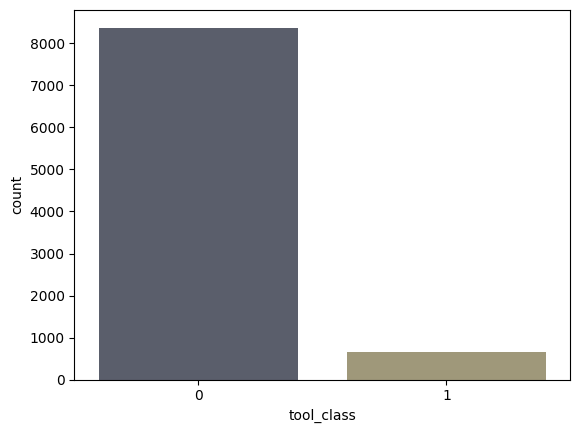

In [16]:
tool_bar_plot = sns.barplot(x="tool_class", y="count", data = df_b, palette="cividis")

fig = tool_bar_plot.get_figure()
fig.savefig("tool_bar_plot.png")

In [11]:
df_features_downloaded_b = df_features_downloaded
df_features_downloaded_b = df_features_downloaded_b.replace(1, 0)
df_features_downloaded_b = df_features_downloaded_b.replace(2, 1)

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

scaler = StandardScaler()
imputed_df_sc = scaler.fit_transform(imputed_df)

imputed_df_sc = pd.DataFrame(imputed_df_sc, columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

relevance_table = calculate_relevance_table(imputed_df_sc, imputed_df_tool_class)

print(relevance_table)

relevance_table = relevance_table.sort_values("p_value", inplace=True)

                                                                                              feature  \
feature                                                                                                 
vib_spindle__quantile__q_0.7                                             vib_spindle__quantile__q_0.7   
vib_spindle__quantile__q_0.6                                             vib_spindle__quantile__q_0.6   
vib_spindle__fft_coefficient__attr_"abs"__coeff_0   vib_spindle__fft_coefficient__attr_"abs"__coeff_0   
vib_spindle__fft_coefficient__attr_"real"__coeff_0  vib_spindle__fft_coefficient__attr_"real"__coe...   
vib_spindle__quantile__q_0.8                                             vib_spindle__quantile__q_0.8   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                           smcdc__number_crossing_m__m_0   
smcdc__number_crossing_m__m_-1                         

In [357]:
pd.DataFrame(imputed_df).columns

RangeIndex(start=0, stop=4503, step=1)

In [13]:
df_selected = select_features(imputed_df_sc, imputed_df_tool_class)

print(df_selected)

      vib_spindle__quantile__q_0.7  vib_spindle__quantile__q_0.6  \
0                        -0.603003                     -0.603893   
1                        -0.603003                     -0.603893   
2                        -0.589502                     -0.603893   
3                        -0.589502                     -0.603893   
4                        -0.589502                     -0.603893   
...                            ...                           ...   
9035                     -0.514499                     -0.525499   
9036                     -0.514499                     -0.525499   
9037                     -0.529500                     -0.525499   
9038                     -0.529500                     -0.525499   
9039                     -0.529500                     -0.525499   

      vib_spindle__fft_coefficient__attr_"abs"__coeff_0  \
0                                             -0.609765   
1                                             -0.608637   
2     

In [14]:
### OVERSAMPLING ###

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.impute import SimpleImputer

ros = RandomOverSampler(random_state=10)
sm = SMOTE(random_state=10)
ada = ADASYN(random_state=10)

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

x_over_ros, y_over_ros = ros.fit_resample(imputed_df, df_features_downloaded_b['tool_class'])
#x_over_sm, _ = sm.fit_resample(imputed_df, imputed_df_tool_class)
#x_over_ada, _ = ada.fit_resample(imputed_df, imputed_df_tool_class)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_over_ros)

x_over_ros_sc = pd.DataFrame(scaler.transform(x_over_ros), columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

x_over_ros_sc

,cut_id,smcac__time_reversal_asymmetry_statistic__lag_1,smcac__time_reversal_asymmetry_statistic__lag_2,smcac__time_reversal_asymmetry_statistic__lag_3,smcac__c3__lag_1,smcac__c3__lag_2,smcac__c3__lag_3,smcac__cid_ce__normalize_True,smcac__cid_ce__normalize_False,smcac__symmetry_looking__r_0.0,...,smcdc__permutation_entropy__dimension_6__tau_1,smcdc__permutation_entropy__dimension_7__tau_1,"smcdc__matrix_profile__feature_""min""__threshold_0.98","smcdc__matrix_profile__feature_""max""__threshold_0.98","smcdc__matrix_profile__feature_""mean""__threshold_0.98","smcdc__matrix_profile__feature_""median""__threshold_0.98","smcdc__matrix_profile__feature_""25""__threshold_0.98","smcdc__matrix_profile__feature_""75""__threshold_0.98",cut_no,case
0,0.005281,-0.064031,-0.330596,-0.270172,0.910959,0.955820,0.943897,-0.811124,-1.007431,0.0,...,0.726078,0.762212,-0.865334,-0.978462,-0.919387,-0.908512,-0.904662,-0.922300,-0.349427,0.244375
1,0.005462,-0.125797,-0.315086,-0.265923,0.904871,0.948870,0.938162,-0.881854,-1.015975,0.0,...,0.725034,0.758272,-0.894621,-0.993872,-0.956442,-0.948887,-0.926894,-0.975067,-0.349427,0.244375
2,0.005642,-0.251839,-0.458608,-0.284497,0.866834,0.922066,0.942438,-0.933097,-1.019873,0.0,...,0.725134,0.759159,-0.899411,-1.000619,-0.965550,-0.958005,-0.933045,-0.990798,-0.349427,0.244375
3,0.005823,-0.042369,-0.267083,-0.203166,0.864779,0.901533,0.831145,-1.143098,-1.031023,0.0,...,0.722756,0.755622,-0.900552,-1.009525,-0.971849,-0.962055,-0.935423,-0.995955,-0.349427,0.244375
4,0.006003,0.173202,-0.103218,-0.190956,0.900090,0.943333,0.911615,-1.303594,-1.044969,0.0,...,0.731669,0.765674,-0.900552,-1.042698,-0.976093,-0.963729,-0.938786,-0.999276,-0.349427,0.244375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16747,1.015109,-0.109907,-0.568417,-1.396828,-0.231761,-0.134101,0.383120,0.709539,0.468790,0.0,...,-1.190175,-1.190860,1.175822,1.050642,1.147380,1.146158,1.165685,1.106467,0.850306,0.688409
16748,0.985323,0.277547,0.083826,0.165953,0.181276,0.081014,-0.421391,0.168442,-0.021759,0.0,...,0.816843,0.820986,-0.839736,-0.958793,-0.897706,-0.873653,-0.873945,-0.911926,0.807458,0.688409
16749,-1.362698,3.556246,2.161577,0.090074,-2.258203,-2.121466,-0.776110,1.962006,2.425021,0.0,...,-1.190175,-1.190860,1.175822,1.050642,1.147380,1.146158,1.165685,1.106467,0.229015,-1.087727
16750,0.964022,0.328105,0.241929,0.117398,0.174766,0.162855,-0.133696,-0.339357,-0.235797,0.0,...,0.816751,0.827353,-0.870845,-1.051815,-0.950531,-0.936816,-0.909958,-0.974777,0.786034,0.688409


In [15]:
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

print(x_over_ros_sc.shape)
print(y_over_ros.shape)

ros_relevance_table = calculate_relevance_table(x_over_ros_sc, y_over_ros)
print(ros_relevance_table)

ros_relevance_table = ros_relevance_table.sort_values("p_value", inplace=True)

(16752, 4503)
(16752,)
                                                                                              feature  \
feature                                                                                                 
cut_id                                                                                         cut_id   
vib_spindle__cwt_coefficients__coeff_10__w_10__...  vib_spindle__cwt_coefficients__coeff_10__w_10_...   
vib_spindle__cwt_coefficients__coeff_10__w_5__w...  vib_spindle__cwt_coefficients__coeff_10__w_5__...   
vib_spindle__cwt_coefficients__coeff_9__w_20__w...  vib_spindle__cwt_coefficients__coeff_9__w_20__...   
vib_spindle__cwt_coefficients__coeff_9__w_10__w...  vib_spindle__cwt_coefficients__coeff_9__w_10__...   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                           smcdc__number_crossing_m__m_0   
smcdc__number_crossing_m__m_-1  

In [16]:
df_selected_ros = select_features(x_over_ros_sc, y_over_ros)

print(df_selected_ros)

         cut_id  \
0      0.005281   
1      0.005462   
2      0.005642   
3      0.005823   
4      0.006003   
...         ...   
16747  1.015109   
16748  0.985323   
16749 -1.362698   
16750  0.964022   
16751  0.116842   

       vib_spindle__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)  \
0                                              -0.121565                      
1                                              -0.659122                      
2                                              -0.234227                      
3                                              -0.482872                      
4                                              -0.378741                      
...                                                  ...                      
16747                                          -0.210118                      
16748                                          -0.494697                      
16749                                          -0.844879    

In [17]:
### UNDERSAMPLING ###

from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer

rus = RandomUnderSampler(random_state=10)

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

x_under_rus, y_under_rus = rus.fit_resample(imputed_df, df_features_downloaded_b['tool_class'])

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_under_rus)

x_under_rus_sc = pd.DataFrame(scaler.transform(x_under_rus), columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

In [19]:
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

print(x_under_rus_sc.shape)
print(y_under_rus.shape)

y_under_rus = y_under_rus.reset_index(drop=True)

print(x_under_rus_sc.sort_index().index)
print(y_under_rus.sort_index().index)

ros_relevance_table = calculate_relevance_table(x_under_rus_sc, y_under_rus)
print(ros_relevance_table)

ros_relevance_table = ros_relevance_table.sort_values("p_value", inplace=True)

(1328, 4503)
(1328,)
RangeIndex(start=0, stop=1328, step=1)
RangeIndex(start=0, stop=1328, step=1)
                                                                                              feature  \
feature                                                                                                 
smcdc__agg_linear_trend__attr_"intercept"__chun...  smcdc__agg_linear_trend__attr_"intercept"__chu...   
smcdc__quantile__q_0.1                                                         smcdc__quantile__q_0.1   
smcdc__fft_coefficient__attr_"abs"__coeff_12             smcdc__fft_coefficient__attr_"abs"__coeff_12   
smcdc__agg_linear_trend__attr_"intercept"__chun...  smcdc__agg_linear_trend__attr_"intercept"__chu...   
smcdc__agg_linear_trend__attr_"intercept"__chun...  smcdc__agg_linear_trend__attr_"intercept"__chu...   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                

In [19]:
df_selected_rus = select_features(x_under_rus_sc, y_under_rus)

print(df_selected_rus)

      smcdc__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"min"  \
0                                             -2.022682                      
1                                             -2.176545                      
2                                              0.113014                      
3                                              0.900918                      
4                                              0.900918                      
...                                                 ...                      
1323                                          -0.425996                      
1324                                          -0.581758                      
1325                                          -0.574315                      
1326                                          -0.570594                      
1327                                          -0.562790                      

      smcdc__quantile__q_0.1  smcdc__fft_coefficient__attr_"abs

In [127]:
### HYBRID ###

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rush = RandomUnderSampler(random_state=14, sampling_strategy=0.2)

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

x_under_rush, y_under_rush = rush.fit_resample(imputed_df, df_features_downloaded_b['tool_class'])

rosh = RandomOverSampler(random_state=14, sampling_strategy=0.5)

x_over_rosh, y_over_rosh = rush.fit_resample(x_under_rush, y_under_rush)

rosh = RandomUnderSampler(random_state=23, sampling_strategy=0.6)

x_over_rosh, y_over_rosh = rush.fit_resample(x_over_rosh, y_over_rosh)

rosh = RandomOverSampler(random_state=6, sampling_strategy=0.7)

x_over_rosh, y_over_rosh = rush.fit_resample(x_over_rosh, y_over_rosh)

rosh = RandomUnderSampler(random_state=18, sampling_strategy=0.8)

x_over_rosh, y_over_rosh = rush.fit_resample(x_over_rosh, y_over_rosh)

rosh = RandomOverSampler(random_state=30, sampling_strategy=0.9)

x_over_rosh, y_over_rosh = rush.fit_resample(x_over_rosh, y_over_rosh)

rosh = RandomUnderSampler(random_state=7, sampling_strategy=1)

x_over_rosh, y_over_rosh = rush.fit_resample(x_over_rosh, y_over_rosh)

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_over_rosh)

x_over_rosh_sc = pd.DataFrame(scaler.transform(x_over_rosh), columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

In [129]:
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

print(x_over_rosh_sc.shape)
print(y_over_rosh.shape)

y_over_rosh = y_over_rosh.reset_index(drop=True)

print(x_over_rosh_sc.sort_index().index)
print(y_over_rosh.sort_index().index)

ros_relevance_table = calculate_relevance_table(x_over_rosh_sc, y_over_rosh)
print(ros_relevance_table)

ros_relevance_table = ros_relevance_table.sort_values("p_value", inplace=True)

(3984, 4503)
(3984,)
RangeIndex(start=0, stop=3984, step=1)
RangeIndex(start=0, stop=3984, step=1)
                                                                                              feature  \
feature                                                                                                 
vib_spindle__quantile__q_0.7                                             vib_spindle__quantile__q_0.7   
vib_spindle__fft_coefficient__attr_"abs"__coeff_0   vib_spindle__fft_coefficient__attr_"abs"__coeff_0   
vib_spindle__fft_coefficient__attr_"real"__coeff_0  vib_spindle__fft_coefficient__attr_"real"__coe...   
vib_spindle__c3__lag_1                                                         vib_spindle__c3__lag_1   
vib_spindle__c3__lag_2                                                         vib_spindle__c3__lag_2   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                

In [130]:
df_selected_rosh = select_features(x_over_rosh_sc, y_over_rosh)

print(df_selected_rosh)

      vib_spindle__quantile__q_0.7  \
0                        -0.115310   
1                        -0.191837   
2                        -0.406113   
3                         0.114271   
4                         3.037605   
...                            ...   
3979                     -0.513251   
3980                     -0.543862   
3981                     -0.543862   
3982                     -0.543862   
3983                     -0.543862   

      vib_spindle__fft_coefficient__attr_"abs"__coeff_0  \
0                                             -0.124850   
1                                             -0.181449   
2                                             -0.398229   
3                                              0.105209   
4                                              2.994563   
...                                                 ...   
3979                                          -0.527679   
3980                                          -0.545543   
3981        

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit(imputed_df)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.42627088 0.18959323]
[498649.39864188 332555.30496184]


MODEL

In [370]:
### Imputed Raw Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = df_selected.iloc[:,:5]
y = imputed_df_tool_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head()

,vib_spindle__quantile__q_0.7,vib_spindle__quantile__q_0.6,"vib_spindle__fft_coefficient__attr_""abs""__coeff_0","vib_spindle__fft_coefficient__attr_""real""__coeff_0",vib_spindle__quantile__q_0.8
6354,0.927056,0.948303,0.960278,0.960278,0.923971
1541,0.237029,0.227081,0.190128,0.190128,0.247192
3133,1.150564,1.183484,1.201322,1.201322,1.125565
322,-0.019480,-0.008101,0.001530,0.001530,-0.040800
2031,-0.184487,-0.180567,-0.172324,-0.172324,-0.184795


In [129]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

results_raw = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores = cross_val_score(clf, X, y, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    cross_val_mean = scores.mean()
    cross_val_std = scores.std()
    
    # Store results
    results_raw[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Cross Validation Mean': cross_val_mean,
        'Cross Validation Standard Deviation': cross_val_std
    }

for name, metrics in results_raw.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"Cross Validation Mean: {metrics['Cross Validation Mean']}")
    print(f"Cross Validation Standard Deviation: {metrics['Cross Validation Standard Deviation']}")
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.9196165191740413
Precision: 0.8535403692778324
Recall: 0.9196165191740413
F1 Score: 0.8853472904533798
Confusion Matrix:
[[2494   12]
 [ 206    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2506
           1       0.00      0.00      0.00       206

    accuracy                           0.92      2712
   macro avg       0.46      0.50      0.48      2712
weighted avg       0.85      0.92      0.89      2712

Cross Validation Mean: 0.921349557522124
Cross Validation Standard Deviation: 0.006955845098346247
----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.9450589970501475
Precision: 0.9459308631009844
Recall: 0.9450589970501475
F1 Score: 0.9454795111605468
Confusion Matrix:
[[2428   78]
 [  71  135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97

In [117]:
### FORWARD SELECTION EXAMPLE ###

from mlxtend.feature_selection import SequentialFeatureSelector

max_f1 = max(results_raw, key=lambda k:float(results_raw[k]['F1 Score']))
max_accuracy = max(results_raw, key=lambda k:float(results_raw[k]['Accuracy']))

print("Best model according to F1 Score: " + max_f1)
print("Best model according to Accuracy: " + max_accuracy)

sfs_os = SequentialFeatureSelector(classifiers[max_f1], forward=True, cv=None, scoring='f1')

selected_features = sfs_os.fit(X, y)

print("Selected feature(s): ")
print(sfs_os.k_feature_names_)

df_sfs = pd.DataFrame(X['vib_spindle__fft_coefficient__attr_"real"__coeff_0'])

X_train_sfs, X_test_sfs, y_train_sfs, y_test_sfs = train_test_split(df_sfs, y, test_size=0.3, random_state=42)

knn_sfs = KNeighborsClassifier()

knn_sfs.fit(X_train_sfs, y_train_sfs)
y_pred_sfs = knn_sfs.predict(X_test_sfs)
scores = cross_val_score(clf, df_sfs, y, cv=5)

accuracy = accuracy_score(y_test_sfs, y_pred_sfs)
precision = precision_score(y_test_sfs, y_pred_sfs, average='weighted')
recall = recall_score(y_test_sfs, y_pred_sfs, average='weighted')
f1 = f1_score(y_test_sfs, y_pred_sfs, average='weighted')
conf_matrix = confusion_matrix(y_test_sfs, y_pred_sfs)
class_report = classification_report(y_test_sfs, y_pred_sfs)
mean = scores.mean()
std = scores.std()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"Cross Validation Mean: {mean}")
print(f"Cross Validation Standard Variation: {std}")
print("----------------------------------------")

Best model according to F1 Score: K-Nearest Neighbors Classifier
Best model according to Accuracy: K-Nearest Neighbors Classifier
Selected feature(s): 
('vib_spindle__fft_coefficient__attr_"real"__coeff_0',)
Accuracy: 0.9229351032448377
Precision: 0.9126390082776801
Recall: 0.9229351032448377
F1 Score: 0.9167019121114113
Confusion Matrix:
[[2432   74]
 [ 135   71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2506
           1       0.49      0.34      0.40       206

    accuracy                           0.92      2712
   macro avg       0.72      0.66      0.68      2712
weighted avg       0.91      0.92      0.92      2712

Cross Validation Mean: 0.9129424778761063
Cross Validation Standard Variation: 0.012898438802786192
----------------------------------------


In [131]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

param_grid = {
    'class_weight': [{0: 1, 1: w} for w in range(1, 20)]
}

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

for classifier in classifiers:

    grid_search = GridSearchCV(estimator=classifiers[classifier], param_grid=param_grid, scoring="f1", cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    mean = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
    std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

    print(f"Best parameters for {classifier}: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score for {classifier}: {grid_search.best_score_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print(f"Cross Validation Mean: {mean}")
    print(f"Cross Validation Standard Variation: {std}")
    print("----------------------------------------")

Best parameters for Logistic Regression: {'class_weight': {0: 1, 1: 6}}
Best cross-validation F1 score for Logistic Regression: 0.43329947804827207
Accuracy: 0.8466076696165191
Precision: 0.9330655693972928
Recall: 0.8466076696165191
F1 Score: 0.8760038273251094
Confusion Matrix:
[[2124  382]
 [  34  172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      2506
           1       0.31      0.83      0.45       206

    accuracy                           0.85      2712
   macro avg       0.65      0.84      0.68      2712
weighted avg       0.93      0.85      0.88      2712

Cross Validation Mean: 0.43329947804827207
Cross Validation Standard Variation: 0.010181689126605843
----------------------------------------
Best parameters for Decision Tree Classifier: {'class_weight': {0: 1, 1: 2}}
Best cross-validation F1 score for Decision Tree Classifier: 0.5963158390046261
Accuracy: 0.946165191740413
Precision: 0.94

In [138]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = [

    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('K-Nearest Neighbors Classifier', KNeighborsClassifier())

]

voting_type = ['hard', 'soft']

for type in voting_type:

    print("Voting type: " + type)

    voting = VotingClassifier(estimators=classifiers, voting=type)

    voting.fit(X_train, y_train)
    y_pred = voting.predict(X_test)
    scores = cross_val_score(voting, X, y, cv=5)

    def evaluate(model, X_train, X_test, y_train, y_test):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        print("Training Set Performance:")
        print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
        print(f"Precision: {precision_score(y_train, y_train_pred, average='weighted')}")
        print(f"Recall: {recall_score(y_train, y_train_pred, average='weighted')}")
        print(f"F1 Score: {f1_score(y_train, y_train_pred, average='weighted')}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_train, y_train_pred))
        print("Classification Report:")
        print(classification_report(y_train, y_train_pred))

        print("\nTest Set Performance:")
        print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
        print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted')}")
        print(f"Recall: {recall_score(y_test, y_test_pred, average='weighted')}")
        print(f"F1 Score: {f1_score(y_test, y_test_pred, average='weighted')}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_test_pred))

        print(f"Cross Validation Mean: {scores.mean()}")
        print(f"Cross Validation Standard Deviation: {scores.std()}")

    evaluate(voting, X_train, X_test, y_train, y_test)

Voting type: hard
Training Set Performance:
Accuracy: 0.9845132743362832
Precision: 0.9847675804882677
Recall: 0.9845132743362832
F1 Score: 0.9836496882422808
Confusion Matrix:
[[5870    0]
 [  98  360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5870
           1       1.00      0.79      0.88       458

    accuracy                           0.98      6328
   macro avg       0.99      0.89      0.94      6328
weighted avg       0.98      0.98      0.98      6328


Test Set Performance:
Accuracy: 0.9553834808259587
Precision: 0.9515994507263353
Recall: 0.9553834808259587
F1 Score: 0.9520524436546894
Confusion Matrix:
[[2474   32]
 [  89  117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2506
           1       0.79      0.57      0.66       206

    accuracy                           0.96      2712
   macro avg       0.8

In [141]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = [

    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('K-Nearest Neighbors Classifier', KNeighborsClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier())

]

voting_type = ['hard', 'soft']

for type in voting_type:

    print("Voting type: " + type)

    voting = VotingClassifier(estimators=classifiers, voting=type)

    voting.fit(X_train, y_train)
    y_pred = voting.predict(X_test)
    scores = cross_val_score(voting, X, y, cv=5)

    def evaluate(model, X_train, X_test, y_train, y_test):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        print("Training Set Performance:")
        print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
        print(f"Precision: {precision_score(y_train, y_train_pred, average='weighted')}")
        print(f"Recall: {recall_score(y_train, y_train_pred, average='weighted')}")
        print(f"F1 Score: {f1_score(y_train, y_train_pred, average='weighted')}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_train, y_train_pred))
        print("Classification Report:")
        print(classification_report(y_train, y_train_pred))

        print("\nTest Set Performance:")
        print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
        print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted')}")
        print(f"Recall: {recall_score(y_test, y_test_pred, average='weighted')}")
        print(f"F1 Score: {f1_score(y_test, y_test_pred, average='weighted')}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_test_pred))

        print(f"Cross Validation Mean: {scores.mean()}")
        print(f"Cross Validation Standard Deviation: {scores.std()}")

    evaluate(voting, X_train, X_test, y_train, y_test)

Voting type: hard
Training Set Performance:
Accuracy: 0.963495575221239
Precision: 0.964877729314649
Recall: 0.963495575221239
F1 Score: 0.9576926558369687
Confusion Matrix:
[[5870    0]
 [ 231  227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5870
           1       1.00      0.50      0.66       458

    accuracy                           0.96      6328
   macro avg       0.98      0.75      0.82      6328
weighted avg       0.96      0.96      0.96      6328


Test Set Performance:
Accuracy: 0.9450589970501475
Precision: 0.9382675644860554
Recall: 0.9450589970501475
F1 Score: 0.9369023474248059
Confusion Matrix:
[[2481   25]
 [ 124   82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2506
           1       0.77      0.40      0.52       206

    accuracy                           0.95      2712
   macro avg       0.86  

In [371]:
from keras import Model, Sequential, layers, ops

#Source: https://www.kaggle.com/code/manohar676/binary-classification-using-mlp-autoencoder

encoding_dim = [100, 50, 25, 12, 6]
actual_dim = X.shape[1]

input_attributes = layers.Input(shape=(actual_dim,))

#encoded = layers.Dense(encoding_dim, activation="relu")(input_attributes)
#decoded = layers.Dense(actual_dim, activation="sigmoid")(encoded)

encoded = layers.Dense(encoding_dim[0], activation="sigmoid")(input_attributes)
encoded = layers.Dense(encoding_dim[1], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[2], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[3], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[4], activation="relu")(encoded)
decoded = layers.Dense(encoding_dim[3], activation="sigmoid")(encoded)
decoded = layers.Dense(encoding_dim[2], activation="sigmoid")(decoded)
decoded = layers.Dense(encoding_dim[1], activation="sigmoid")(decoded)
decoded = layers.Dense(encoding_dim[0], activation="sigmoid")(decoded)

output = layers.Dense(actual_dim, activation="relu")(decoded)

autoencoder = Model(input_attributes, output)

print(autoencoder.summary())

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 25)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,629 (57.14 KB)

 Trainable params: 14,629 (57.14 KB)

 Non-trainable params: 0 (0.00 B)

None


In [372]:
encoder = Model(input_attributes, encoded)

X_train_0 = X_train.iloc[np.where(y_train == 0)]
y_train_0 = y_train[y_train == 0]

X_train_nonLinear_features = encoder.predict(X_train_0)
X_test_nonLinear_features = encoder.predict(X_test)

X_train_0 = np.concatenate((X_train_0, X_train_nonLinear_features), axis=1)
X_test_0 = np.concatenate((X_test, X_test_nonLinear_features), axis=1)

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step


In [373]:
perceptron_model = Sequential()

perceptron_model.add(layers.Dense(1, input_dim=X_train_0.shape[1], activation='sigmoid'))

perceptron_model.compile(loss='mse', optimizer='adam')

perceptron_model.fit(X_train_0, y_train_0, epochs=10)

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.3074
Epoch 2/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.2519
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.2187
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 0.1875
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.1747
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - loss: 0.1431
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.0746
Epoch 8/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.0312
Epoch 9/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.0221
Epoch 10/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.0166


In [377]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

test_pred=perceptron_model.predict(X_test_0)
rmse = np.sqrt((y_test.values - test_pred.flatten())**2)
y_pred_binary = (rmse <= 0.5).astype(int) #0.1531
#scores = cross_val_score(perceptron_model, X, y, cv=5)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')
conf_matrix_model = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[   0 2506]
 [ 206    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    2506.0
           1       0.00      0.00      0.00     206.0

    accuracy                           0.00    2712.0
   macro avg       0.00      0.00      0.00    2712.0
weighted avg       0.00      0.00      0.00    2712.0



In [375]:
np.where(y_train == 0)

(array([   0,    1,    2, ..., 6325, 6326, 6327], dtype=int64),)

In [376]:
test_pred[9]

array([0.11666754], dtype=float32)

In [353]:
print(y_train.value_counts())

tool_class
0    5870
1     458
Name: count, dtype: int64


In [90]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X[y == 0], X[y == 0], shuffle=True, validation_split= 0.2, epochs=10)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.2532 - val_loss: 0.4648
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1941 - val_loss: 0.4648
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1759 - val_loss: 0.4648
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2288 - val_loss: 0.4648
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1739 - val_loss: 0.4648
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2227 - val_loss: 0.4648
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1618 - val_loss: 0.4648
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2356 - val_loss: 0.4648
Epoch 9/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1432 - val_loss: 0.4648
Epoch 10/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1789 - val_loss: 0.4648


In [91]:
hidden_representation = Sequential() 
hidden_representation.add(autoencoder.layers[0]) 
hidden_representation.add(autoencoder.layers[1]) 
hidden_representation.add(autoencoder.layers[2]) 
hidden_representation.add(autoencoder.layers[3]) 
hidden_representation.add(autoencoder.layers[4]) 

In [101]:
hidden_rep_0 = hidden_representation.predict(X[y == 0])
hidden_rep_1 = hidden_representation.predict(X[y == 1])

encoded_X = np.append(hidden_rep_0, hidden_rep_1, axis = 0)
y_0 = np.zeros(hidden_rep_0.shape[0])
y_1 = np.ones(hidden_rep_1.shape[0])
encoded_y = np.append(y_0, y_1)

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_X, encoded_y, test_size = 0.3, random_state=42)

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

logreg = KNeighborsClassifier()
logreg.fit(X_train_encoded, y_train_encoded)
y_pred_encoded = logreg.predict(X_test_encoded)


accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
conf_matrix_model = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)

Accuracy: 0.948377581120944
Precision: 0.9466432531239214
Recall: 0.948377581120944
F1 Score: 0.9474395340481275
Confusion Matrix:
[[2463   63]
 [  77  109]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2526
         1.0       0.63      0.59      0.61       186

    accuracy                           0.95      2712
   macro avg       0.80      0.78      0.79      2712
weighted avg       0.95      0.95      0.95      2712



In [80]:
### Oversampled Data ###
from sklearn.model_selection import train_test_split

#X = df_selected_ros.iloc[:,:5]
#y = y_over_ros

X = x_over_ros_sc[df_selected.iloc[:,:5].columns.to_list()]
y = y_over_ros

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X, y, test_size=0.3, random_state=42)

#X_train_norm_ros, X_test_norm_ros, y_train_norm_ros, y_test_norm_ros = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_ros.head()

,vib_spindle__quantile__q_0.7,vib_spindle__quantile__q_0.6,"vib_spindle__fft_coefficient__attr_""abs""__coeff_0","vib_spindle__fft_coefficient__attr_""real""__coeff_0",vib_spindle__quantile__q_0.8
4600,-0.240501,-0.246636,-0.231956,-0.231956,-0.229876
16016,-0.486917,-0.503777,-0.500135,-0.500135,-0.484845
8675,-0.013040,-0.009276,-0.018180,-0.018180,-0.029543
4371,-0.486917,-0.483997,-0.508411,-0.508411,-0.495772
8618,0.176511,0.188525,0.186509,0.186509,0.170789


In [81]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

results_os = {}

for name, clf in classifiers.items():
    clf.fit(X_train_ros, y_train_ros)
    y_pred_ros = clf.predict(X_test)
    scores = cross_val_score(clf, X, y, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_ros)
    precision = precision_score(y_test, y_pred_ros, average='weighted')
    recall = recall_score(y_test, y_pred_ros, average='weighted')
    f1 = f1_score(y_test, y_pred_ros, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred_ros)
    class_report = classification_report(y_test, y_pred_ros)
    cross_val_mean = scores.mean()
    cross_val_std = scores.std()
    
    # Store results
    results_os[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Cross Validation Mean': cross_val_mean,
        'Cross Validation Standard Deviation': cross_val_std
    }

for name, metrics in results_os.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"Cross Validation Mean: {metrics['Cross Validation Mean']}")
    print(f"Cross Validation Standard Deviation: {metrics['Cross Validation Standard Deviation']}")
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.5206489675516224
Precision: 0.9344313992799697
Recall: 0.5206489675516224
F1 Score: 0.6187074779307683
Confusion Matrix:
[[1206 1300]
 [   0  206]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65      2506
           1       0.14      1.00      0.24       206

    accuracy                           0.52      2712
   macro avg       0.57      0.74      0.45      2712
weighted avg       0.93      0.52      0.62      2712

Cross Validation Mean: 0.7831889611922482
Cross Validation Standard Deviation: 0.02281255052405427
----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.8130530973451328
Precision: 0.845089615075447
Recall: 0.8130530973451328
F1 Score: 0.8287618718514959
Confusion Matrix:
[[2205  301]
 [ 206    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90 

In [85]:
### FORWARD SELECTION EXAMPLE ###

from mlxtend.feature_selection import SequentialFeatureSelector

max_f1 = max(results_os, key=lambda k:float(results_os[k]['F1 Score']))
max_accuracy = max(results_os, key=lambda k:float(results_os[k]['Accuracy']))

print("Best model according to F1 Score: " + max_f1)
print("Best model according to Accuracy: " + max_accuracy)

sfs_os = SequentialFeatureSelector(classifiers[max_f1], forward=True, cv=None, scoring='f1')

selected_features = sfs_os.fit(X, y)

print("Selected feature(s): ")
print(sfs_os.k_feature_names_)

df_sfs = pd.DataFrame(X['vib_spindle__fft_coefficient__attr_"abs"__coeff_0'])

X_train_sfs, X_test_sfs, y_train_sfs, y_test_sfs = train_test_split(df_sfs, y, test_size=0.3, random_state=42)

knn_sfs = KNeighborsClassifier()

knn_sfs.fit(X_train_sfs, y_train_sfs)
y_pred_sfs = knn_sfs.predict(pd.DataFrame(X_test['vib_spindle__fft_coefficient__attr_"abs"__coeff_0']))
scores = cross_val_score(clf, df_sfs, y, cv=5)

accuracy = accuracy_score(y_test, y_pred_sfs)
precision = precision_score(y_test, y_pred_sfs, average='weighted')
recall = recall_score(y_test, y_pred_sfs, average='weighted')
f1 = f1_score(y_test, y_pred_sfs, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_sfs)
class_report = classification_report(y_test, y_pred_sfs)
mean = scores.mean()
std = scores.std()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"Cross Validation Mean: {mean}")
print(f"Cross Validation Standard Variation: {std}")
print("----------------------------------------")

Best model according to F1 Score: Decision Tree Classifier
Best model according to Accuracy: Decision Tree Classifier
Selected feature(s): 
('vib_spindle__fft_coefficient__attr_"abs"__coeff_0',)
Accuracy: 0.726401179941003
Precision: 0.836563123590144
Recall: 0.726401179941003
F1 Score: 0.7775998961692239
Confusion Matrix:
[[1970  536]
 [ 206    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      2506
           1       0.00      0.00      0.00       206

    accuracy                           0.73      2712
   macro avg       0.45      0.39      0.42      2712
weighted avg       0.84      0.73      0.78      2712

Cross Validation Mean: 0.7454587403181051
Cross Validation Standard Variation: 0.06213935104644153
----------------------------------------


In [86]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

param_grid = {
    'class_weight': [{0: 1, 1: w} for w in range(1, 20)]
}

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

for classifier in classifiers:

    grid_search = GridSearchCV(estimator=classifiers[classifier], param_grid=param_grid, scoring="f1", cv=5)
    grid_search.fit(X_train_ros, y_train_ros)
    y_pred_ros = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_ros)
    precision = precision_score(y_test, y_pred_ros, average='weighted')
    recall = recall_score(y_test, y_pred_ros, average='weighted')
    f1 = f1_score(y_test, y_pred_ros, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred_ros)
    class_report = classification_report(y_test, y_pred_ros)
    mean = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
    std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

    print(f"Best parameters for {classifier}: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score for {classifier}: {grid_search.best_score_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print(f"Cross Validation Mean: {mean}")
    print(f"Cross Validation Standard Variation: {std}")
    print("----------------------------------------")

Best parameters for Logistic Regression: {'class_weight': {0: 1, 1: 4}}
Best cross-validation F1 score for Logistic Regression: 0.8048837747299752
Accuracy: 0.34476401179941
Precision: 0.9319321162030653
Recall: 0.34476401179940996
F1 Score: 0.43075774689189805
Confusion Matrix:
[[ 729 1777]
 [   0  206]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.45      2506
           1       0.10      1.00      0.19       206

    accuracy                           0.34      2712
   macro avg       0.55      0.65      0.32      2712
weighted avg       0.93      0.34      0.43      2712

Cross Validation Mean: 0.8048837747299752
Cross Validation Standard Variation: 0.0024207063588611486
----------------------------------------
Best parameters for Decision Tree Classifier: {'class_weight': {0: 1, 1: 12}}
Best cross-validation F1 score for Decision Tree Classifier: 0.98187687586502
Accuracy: 0.8377581120943953
Precision: 0.847

In [87]:
from keras import Sequential, layers, ops

#Source: https://www.kaggle.com/code/manohar676/binary-classification-using-mlp-autoencoder

perceptron_model = Sequential()
perceptron_model.add(layers.Dense(1, input_dim=X_train_ros.shape[1], activation='sigmoid', kernel_initializer='normal'))

perceptron_model.compile(loss='binary_crossentropy', optimizer='adam')

perceptron_model.fit(X_train_ros, y_train_ros, epochs=100)

Epoch 1/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6280
Epoch 2/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.5426
Epoch 3/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5152
Epoch 4/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4980
Epoch 5/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4799
Epoch 6/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4749
Epoch 7/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4643
Epoch 8/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4668
Epoch 9/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4627
Epoch 10/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4557
Epoch 11/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4625
Epoch 12/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4535
Epoch 13/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4594
Epoch 14/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4498
Epoch 15/100
367/367 ━━━━━━━━━━━━━━━━━━━━

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_model = perceptron_model.predict(X_test)
y_pred_binary = (y_pred_model >= 0.5).astype(int)
#scores = cross_val_score(model, X, y, cv=5)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')
conf_matrix_model = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
Accuracy: 0.5228613569321534
Precision: 0.934472959685349
Recall: 0.5228613569321534
F1 Score: 0.620785196999607
Confusion Matrix:
[[1212 1294]
 [   0  206]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65      2506
           1       0.14      1.00      0.24       206

    accuracy                           0.52      2712
   macro avg       0.57      0.74      0.45      2712
weighted avg       0.93      0.52      0.62      2712



In [89]:
from keras import Model

encoding_dim = [100, 50, 25, 12, 6]
actual_dim = X_test_ros.shape[1]

input_attributes = layers.Input(shape=(actual_dim,))

#encoded = layers.Dense(encoding_dim, activation="relu")(input_attributes)
#decoded = layers.Dense(actual_dim, activation="sigmoid")(encoded)

encoded = layers.Dense(encoding_dim[0], activation="sigmoid")(input_attributes)
encoded = layers.Dense(encoding_dim[1], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[2], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[3], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[4], activation="relu")(encoded)
decoded = layers.Dense(encoding_dim[3], activation="sigmoid")(encoded)
decoded = layers.Dense(encoding_dim[2], activation="sigmoid")(decoded)
decoded = layers.Dense(encoding_dim[1], activation="sigmoid")(decoded)
decoded = layers.Dense(encoding_dim[0], activation="sigmoid")(decoded)

output = layers.Dense(actual_dim, activation="relu")(decoded)

autoencoder = Model(input_attributes, output)

print(autoencoder.summary())

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,629 (57.14 KB)

 Trainable params: 14,629 (57.14 KB)

 Non-trainable params: 0 (0.00 B)

None


In [90]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X[y == 0], X[y == 0], shuffle=True, validation_split= 0.2, epochs=10)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.2663 - val_loss: 0.8171
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0406 - val_loss: 0.8171
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0823 - val_loss: 0.8171
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0706 - val_loss: 0.8171
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0751 - val_loss: 0.8171
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0720 - val_loss: 0.8171
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0329 - val_loss: 0.8171
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1464 - val_loss: 0.8171
Epoch 9/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0309 - val_loss: 0.8171
Epoch 10/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0732 - val_loss: 0.8171


In [91]:
hidden_representation = Sequential() 
hidden_representation.add(autoencoder.layers[0]) 
hidden_representation.add(autoencoder.layers[1]) 
hidden_representation.add(autoencoder.layers[2]) 
hidden_representation.add(autoencoder.layers[3]) 
hidden_representation.add(autoencoder.layers[4]) 

In [47]:
#X_train_non_linear = encoder.predict(X_train_ros)
#X_test_non_linear = encoder.predict(X_test_ros)

#X_train_new = np.concatenate((X_train_ros, X_train_non_linear), axis=1)
#X_test_new = np.concatenate((X_test_ros, X_test_non_linear), axis=1)

#new_model = Sequential()

#new_model.add(layers.Dense(1, input_dim=X_train_new.shape[1], activation='sigmoid'))

#new_model.compile(loss='binary_crossentropy', optimizer='adam')

#new_model.fit(X_train_new, y_train_ros, epochs=10)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.3983
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8804
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5667
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5681
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5604
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5740
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5579
Epoch 8/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5465
Epoch 9/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5527
Epoch 10/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5421


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

hidden_rep_0 = hidden_representation.predict(X[y == 0])
hidden_rep_1 = hidden_representation.predict(X[y == 1])

encoded_X = np.append(hidden_rep_0, hidden_rep_1, axis = 0)
y_0 = np.zeros(hidden_rep_0.shape[0])
y_1 = np.ones(hidden_rep_1.shape[0])
encoded_y = np.append(y_0, y_1)

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_X, encoded_y, test_size = 0.3)

logreg = RandomForestClassifier()
logreg.fit(X_train_encoded, y_train_encoded)
y_pred_encoded = logreg.predict(X_test_encoded)

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step


In [99]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
conf_matrix_model = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)

Accuracy: 0.9832869080779945
Precision: 0.9838250068596919
Recall: 0.9832869080779945
F1 Score: 0.9832809030442166
Confusion Matrix:
[[2417   84]
 [   0 2525]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2501
         1.0       0.97      1.00      0.98      2525

    accuracy                           0.98      5026
   macro avg       0.98      0.98      0.98      5026
weighted avg       0.98      0.98      0.98      5026



In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_model = new_model.predict(X_test_new)
y_pred_binary = (y_pred_model >= 0.5).astype(int)
#scores = cross_val_score(model, X, y, cv=5)

accuracy = accuracy_score(y_test_ros, y_pred_binary)
precision = precision_score(y_test_ros, y_pred_binary, average='weighted')
recall = recall_score(y_test_ros, y_pred_binary, average='weighted')
f1 = f1_score(y_test_ros, y_pred_binary, average='weighted')
conf_matrix_model = confusion_matrix(y_test_ros, y_pred_binary)
class_report = classification_report(y_test_ros, y_pred_binary)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.724233983286908
Precision: 0.7315023566148781
Recall: 0.724233983286908
F1 Score: 0.7222506519259217
Confusion Matrix:
[[1614  912]
 [ 474 2026]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      2526
           1       0.69      0.81      0.75      2500

    accuracy                           0.72      5026
   macro avg       0.73      0.72      0.72      5026
weighted avg       0.73      0.72      0.72      5026



In [100]:
### Undersampled Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = x_under_rus_sc[df_selected.iloc[:,:5].columns.to_list()]
y = y_under_rus

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_rus.head()

,vib_spindle__quantile__q_0.7,vib_spindle__quantile__q_0.6,"vib_spindle__fft_coefficient__attr_""abs""__coeff_0","vib_spindle__fft_coefficient__attr_""real""__coeff_0",vib_spindle__quantile__q_0.8
618,-0.443592,-0.460296,-0.461212,-0.461212,-0.405313
538,-0.215526,-0.201405,-0.206388,-0.206388,-0.204924
139,-0.329559,-0.300979,-0.323145,-0.323145,-0.350661
1164,-0.367570,-0.380637,-0.384478,-0.384478,-0.368879
1029,-0.462597,-0.460296,-0.466979,-0.466979,-0.441747


In [102]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_rus, y_train_rus)
    y_pred_rus = clf.predict(X_test)
    scores = cross_val_score(clf, X, y, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_rus)
    precision = precision_score(y_test, y_pred_rus, average='weighted')
    recall = recall_score(y_test, y_pred_rus, average='weighted')
    f1 = f1_score(y_test, y_pred_rus, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred_rus)
    class_report = classification_report(y_test, y_pred_rus)
    cross_val_mean = scores.mean()
    cross_val_std = scores.std()

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Cross Validation Mean': cross_val_mean,
        'Cross Validation Standard Deviation': cross_val_std
    }

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"Cross Validation Mean: {metrics['Cross Validation Mean']}")
    print(f"Cross Validation Standard Deviation: {metrics['Cross Validation Standard Deviation']}")
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.4937315634218289
Precision: 0.9339510462728922
Recall: 0.4937315634218289
F1 Score: 0.5929313750319744
Confusion Matrix:
[[1133 1373]
 [   0  206]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62      2506
           1       0.13      1.00      0.23       206

    accuracy                           0.49      2712
   macro avg       0.57      0.73      0.43      2712
weighted avg       0.93      0.49      0.59      2712

Cross Validation Mean: 0.8292943413810908
Cross Validation Standard Deviation: 0.0466245962593637
----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.7496312684365781
Precision: 0.8454327574193398
Recall: 0.7496312684365782
F1 Score: 0.7938856206071762
Confusion Matrix:
[[2020  486]
 [ 193   13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86 

In [294]:
### Hybrid Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = x_over_rosh_sc[df_selected.iloc[:,:5].columns.to_list()]
y = y_over_rosh

X_train_rosh, X_test_rosh, y_train_rosh, y_test_rosh = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_rosh.head()

,vib_spindle__quantile__q_0.7,vib_spindle__quantile__q_0.6,"vib_spindle__fft_coefficient__attr_""abs""__coeff_0","vib_spindle__fft_coefficient__attr_""real""__coeff_0",vib_spindle__quantile__q_0.8
2355,-0.176532,-0.157804,-0.173314,-0.173314,-0.175594
565,0.022438,0.034095,0.049794,0.049794,0.015413
313,-0.390808,-0.397678,-0.400809,-0.400809,-0.395986
601,-0.253059,-0.253753,-0.254514,-0.254514,-0.234365
233,-0.513251,-0.525610,-0.550703,-0.550703,-0.513529


In [133]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_rosh, y_train_rosh)
    y_pred_rosh = clf.predict(X_test)
    scores = cross_val_score(clf, X, y, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_rosh)
    precision = precision_score(y_test, y_pred_rosh, average='weighted')
    recall = recall_score(y_test, y_pred_rosh, average='weighted')
    f1 = f1_score(y_test, y_pred_rosh, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred_rosh)
    class_report = classification_report(y_test, y_pred_rosh)
    cross_val_mean = scores.mean()
    cross_val_std = scores.std()
        
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Cross Validation Mean': cross_val_mean,
        'Cross Validation Standard Deviation': cross_val_std        
    }

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"Cross Validation Mean: {metrics['Cross Validation Mean']}")
    print(f"Cross Validation Standard Deviation: {metrics['Cross Validation Standard Deviation']}")
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.8757374631268436
Precision: 0.8921787852106476
Recall: 0.8757374631268436
F1 Score: 0.8833876282711883
Confusion Matrix:
[[2305  201]
 [ 136   70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2506
           1       0.26      0.34      0.29       206

    accuracy                           0.88      2712
   macro avg       0.60      0.63      0.61      2712
weighted avg       0.89      0.88      0.88      2712

Cross Validation Mean: 0.8124962957825513
Cross Validation Standard Deviation: 0.010674955713720112
----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.8569321533923304
Precision: 0.8860597745865324
Recall: 0.8569321533923304
F1 Score: 0.8702138189614549
Confusion Matrix:
[[2258  248]
 [ 140   66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.9

In [134]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

param_grid = {
    'class_weight': [{0: 1, 1: w} for w in range(1, 20)]
}

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

for classifier in classifiers:

    grid_search = GridSearchCV(estimator=classifiers[classifier], param_grid=param_grid, scoring="f1", cv=5)
    grid_search.fit(X_train_rosh, y_train_rosh)
    y_pred_rosh = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rosh)
    precision = precision_score(y_test, y_pred_rosh, average='weighted')
    recall = recall_score(y_test, y_pred_rosh, average='weighted')
    f1 = f1_score(y_test, y_pred_rosh, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred_rosh)
    class_report = classification_report(y_test, y_pred_rosh)
    mean = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
    std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

    print(f"Best parameters for {classifier}: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score for {classifier}: {grid_search.best_score_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print(f"Cross Validation Mean: {mean}")
    print(f"Cross Validation Standard Variation: {std}")
    print("----------------------------------------")

Best parameters for Logistic Regression: {'class_weight': {0: 1, 1: 2}}
Best cross-validation F1 score for Logistic Regression: 0.6457217145160996
Accuracy: 0.7971976401179941
Precision: 0.9280052232927853
Recall: 0.7971976401179941
F1 Score: 0.8411335659357556
Confusion Matrix:
[[1989  517]
 [  33  173]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      2506
           1       0.25      0.84      0.39       206

    accuracy                           0.80      2712
   macro avg       0.62      0.82      0.63      2712
weighted avg       0.93      0.80      0.84      2712

Cross Validation Mean: 0.6457217145160996
Cross Validation Standard Variation: 0.03163267834190334
----------------------------------------
Best parameters for Decision Tree Classifier: {'class_weight': {0: 1, 1: 18}}
Best cross-validation F1 score for Decision Tree Classifier: 0.7364982010404797
Accuracy: 0.8550884955752213
Precision: 0.885

In [295]:
from keras import Model, Sequential, layers, ops

#Source: https://www.kaggle.com/code/manohar676/binary-classification-using-mlp-autoencoder

encoding_dim = [100, 50, 25, 12, 6]
actual_dim = X.shape[1]

input_attributes = layers.Input(shape=(actual_dim,))

#encoded = layers.Dense(encoding_dim, activation="relu")(input_attributes)
#decoded = layers.Dense(actual_dim, activation="sigmoid")(encoded)

encoded = layers.Dense(encoding_dim[0], activation="sigmoid")(input_attributes)
encoded = layers.Dense(encoding_dim[1], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[2], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[3], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[4], activation="relu")(encoded)
decoded = layers.Dense(encoding_dim[3], activation="sigmoid")(encoded)
decoded = layers.Dense(encoding_dim[2], activation="sigmoid")(decoded)
decoded = layers.Dense(encoding_dim[1], activation="sigmoid")(decoded)
decoded = layers.Dense(encoding_dim[0], activation="sigmoid")(decoded)

output = layers.Dense(actual_dim, activation="relu")(decoded)

autoencoder = Model(input_attributes, output)

print(autoencoder.summary())

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 25)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,629 (57.14 KB)

 Trainable params: 14,629 (57.14 KB)

 Non-trainable params: 0 (0.00 B)

None


In [296]:
import keras

encoder = keras.Model(input_attributes, encoded)

X_train_nonLinear_features_rosh = encoder.predict(X_train_rosh)
X_test_nonLinear_features_rosh = encoder.predict(X_test_rosh)

X_train_rosh_nonLinear = np.concatenate((X_train_rosh, X_train_nonLinear_features_rosh), axis=1)
X_test_rosh_nonLinear = np.concatenate((X_test_rosh, X_test_nonLinear_features_rosh), axis=1)

X_train_nonLinear_features_normal = encoder.predict(X_train)
X_test_nonLinear_features_normal = encoder.predict(X_test)

X_train_normal = np.concatenate((X_train, X_train_nonLinear_features_normal), axis=1)
X_test_normal = np.concatenate((X_test, X_test_nonLinear_features_normal), axis=1)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step


In [298]:
perceptron_model = Sequential()

perceptron_model.add(layers.Dense(1, input_dim=X_train_rosh_nonLinear.shape[1], activation='sigmoid'))

perceptron_model.compile(loss='mse', optimizer='adam')

perceptron_model.fit(X_train_rosh_nonLinear, y_train_rosh, epochs=10)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.1800
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.1635
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.1496
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1369  
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1395
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1329
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1313
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1261
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1272
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1232


In [328]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error
from src.models import model

from onnxruntime import InferenceSession
import os
import subprocess

import keras


# todo: model pathi düzenlemek gerek
class Model:
    @staticmethod
    def save_model(model, name):
        if not os.path.exists(name):
            os.mkdir(name)
        model.save(name)
        # Run the command line.
        proc = subprocess.run(f'/home/safir/.virtualenvs/epdk/bin/python -m tf2onnx.convert --saved-model {name} '
                              f'--output {name}.onnx --opset 12'.split(),
                              capture_output=True)
        print(proc.returncode)
        print(proc.stdout.decode('ascii'))
        print(proc.stderr.decode('ascii'))

    @staticmethod
    def load_predict(path, test_data):
        session = InferenceSession(path)
        return session.run(None, {'dense_input': test_data})[0]

    @staticmethod
    def load_session(path):
        return InferenceSession(path)

test_pred=perceptron_model.predict(X_test_normal)
train_pred=perceptron_model.predict(X_train_normal)
rmse = np.sqrt((y_test.values - test_pred.flatten())**2)
rmse_train = np.sqrt((y_train.values - train_pred.flatten())**2)
#rmse = np.sqrt((y_test.values - test_pred.flatten())**2/len(y_test.values))
y_pred_binary = (rmse >= 0.5).astype(int) #0.321
y_pred_train_binary = (rmse_train >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')
conf_matrix_model = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)
print("---------------------------")

accuracy = accuracy_score(y_train, y_pred_train_binary)
precision = precision_score(y_train, y_pred_train_binary, average='weighted')
recall = recall_score(y_train, y_pred_train_binary, average='weighted')
f1 = f1_score(y_train, y_pred_train_binary, average='weighted')
conf_matrix_model = confusion_matrix(y_train, y_pred_train_binary)
class_report = classification_report(y_train, y_pred_train_binary)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)

#modelling = Model()

#saved_model = modelling.save_model(perceptron_model, "autoencoder_hybrid")

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[2506    0]
 [   0  206]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2506
           1       1.00      1.00      1.00       206

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712

---------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[5870    0]
 [   0  458]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5870
           1       1.00      1.00      1.00       458

    accuracy                           1.00      6328
   macro avg       1.00      1.00      1.00      6328
weighted avg       1.00      1.00      1.00

In [312]:
print(y_test.values[53])

1


In [314]:
print(test_pred[53])
print(np.array(y_test.values).reshape(-1, 1)[53])

[0.33008775]
[1]


In [315]:
rmse = np.sqrt((y_test.values[53] - test_pred.flatten()[53])**2)
print(rmse)
#y_pred_binary = (rmse >= 0.5).astype(int) #0.321

0.6699122488498688
